In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
titanic_data=fetch_openml("titanic" , version=1 , as_frame=True)

In [3]:
df=titanic_data['data']

In [4]:
df['survived']=titanic_data['target']

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [6]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0 , 'travelled_alone']=0
df.loc[df['family']==0 , 'travelled_alone']=1

In [7]:
df['family'].head()

,family
0,0
1,3
2,3
3,3
4,3


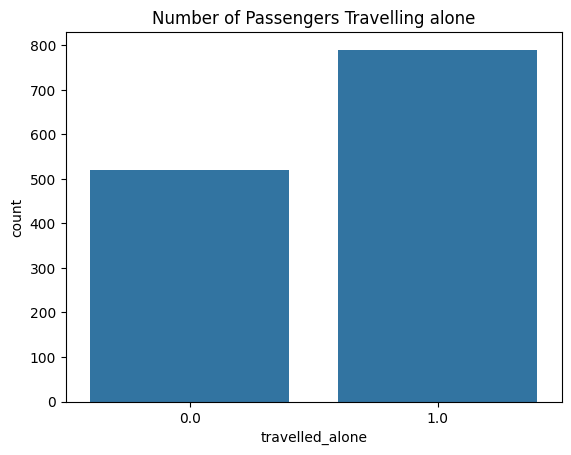

In [8]:
df.drop(['sibsp' , 'parch'], axis=1 , inplace=True)
sns.countplot(x='travelled_alone' , data=df)
plt.title("Number of Passengers Travelling alone")
plt.show()

<Axes: xlabel='survived', ylabel='count'>

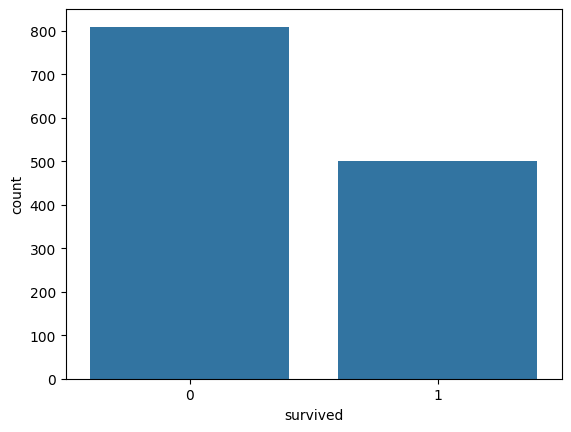

In [9]:
sns.countplot(x="survived" , data=df)

<Axes: xlabel='survived', ylabel='count'>

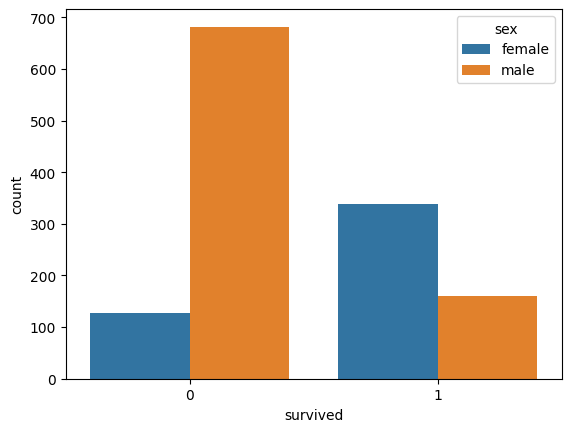

In [10]:
sns.countplot(x="survived" , hue="sex" , data=df)

<Axes: xlabel='survived', ylabel='count'>

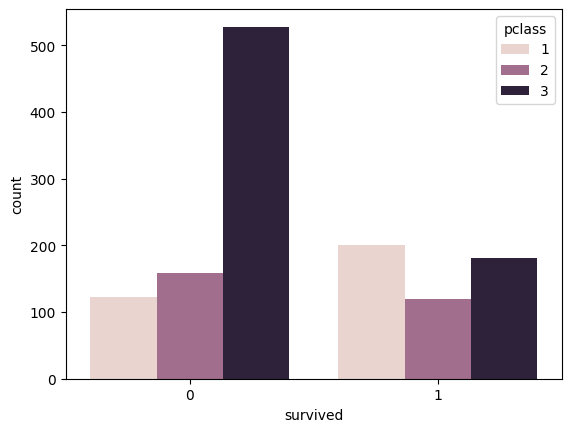

In [11]:
sns.countplot(x="survived" , hue="pclass" , data=df)

<Axes: ylabel='Frequency'>

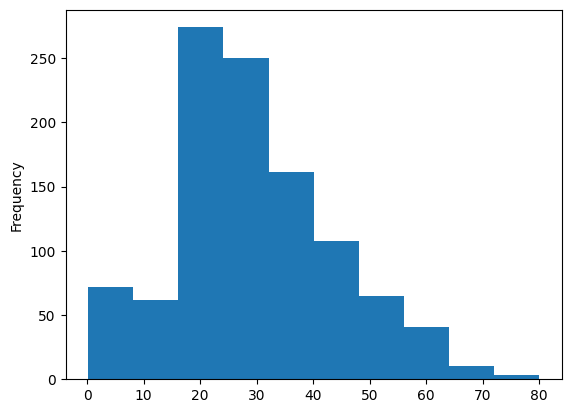

In [12]:
df['age'].plot.hist()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pclass           1309 non-null   int64   
 1   name             1309 non-null   object  
 2   sex              1309 non-null   category
 3   age              1046 non-null   float64 
 4   ticket           1309 non-null   object  
 5   fare             1308 non-null   float64 
 6   cabin            295 non-null    object  
 7   embarked         1307 non-null   category
 8   boat             486 non-null    object  
 9   body             121 non-null    float64 
 10  home.dest        745 non-null    object  
 11  survived         1309 non-null   category
 12  family           1309 non-null   int64   
 13  travelled_alone  1309 non-null   float64 
dtypes: category(3), float64(4), int64(2), object(5)
memory usage: 116.8+ KB


In [14]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
ticket,0
fare,1
cabin,1014
embarked,2
boat,823
body,1188


<Axes: title={'center': 'missing values in percentage'}, ylabel='percentage'>

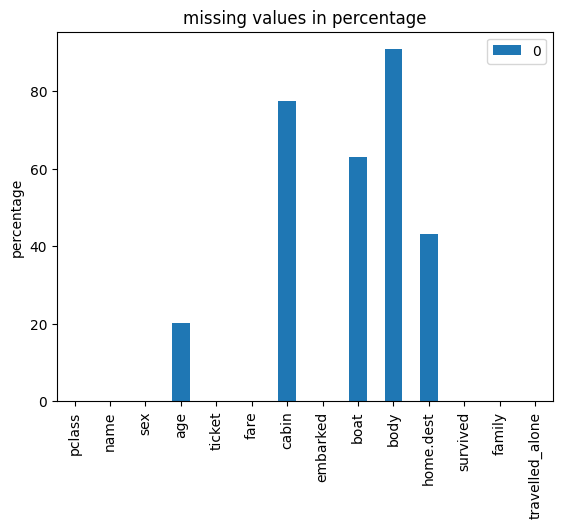

In [15]:
miss_values=pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_values.plot(kind='bar' , title='missing values in percentage' , ylabel='percentage')

In [16]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0


In [17]:
df.drop(['name' , 'ticket' , 'home.dest'] , axis=1 , inplace=True)

In [18]:
df.drop(['cabin' ,'body' , 'boat'] , axis=1 , inplace=True)

In [19]:
sex=pd.get_dummies(df['sex'] , drop_first=True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [20]:
df.isnull().sum()

,0
pclass,0
sex,0
age,263
fare,1
embarked,2
survived,0
family,0
travelled_alone,0


In [21]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy='mean')

In [22]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [23]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,2
survived,0
family,0
travelled_alone,0


In [24]:
imp_freq=SimpleImputer(strategy='most_frequent')

In [25]:
df['embarked']=imp_freq.fit_transform(df[['embarked']]).flatten()

In [26]:
df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
embarked,0
survived,0
family,0
travelled_alone,0


In [27]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [28]:
embark=pd.get_dummies(df['embarked'] , drop_first=True)
print(embark)

          Q      S
0     False   True
1     False   True
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False  False
1305  False  False
1306  False  False
1307  False  False
1308  False   True

[1309 rows x 2 columns]


In [29]:
df.drop(['embarked'] , axis=1 , inplace=True)
df=pd.concat([df,embark] , axis=1)

In [31]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,0,29.0000,211.3375,1,0,1.0,0,1
1,1,1,0.9167,151.5500,1,3,0.0,0,1
2,1,0,2.0000,151.5500,0,3,0.0,0,1
3,1,1,30.0000,151.5500,0,3,0.0,0,1
4,1,0,25.0000,151.5500,0,3,0.0,0,1


In [33]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['Q'] = df['Q'].astype(int)
df['S'] = df['S'].astype(int)

In [32]:
X=df.drop(['survived'] , axis=1)
X.head()

,pclass,sex,age,fare,family,travelled_alone,Q,S
0,1,0,29.0000,211.3375,0,1.0,0,1
1,1,1,0.9167,151.5500,3,0.0,0,1
2,1,0,2.0000,151.5500,3,0.0,0,1
3,1,1,30.0000,151.5500,3,0.0,0,1
4,1,0,25.0000,151.5500,3,0.0,0,1


In [34]:
y=df['survived']
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(X , y, test_size=0.3 , random_state=1)

In [36]:
print(X_train.shape , y_train.shape)

(916, 8) (916,)


In [37]:
print(X_test.shape , y_test.shape)

(393, 8) (393,)


In [38]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pred=mod.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , pred)

0.7964376590330788

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , pred)

array([[204,  32],
       [ 48, 109]])